In [6]:
print ( 10 ) 

10


Text(0.5, 1.0, 'Waveform with sample rate = 44100')

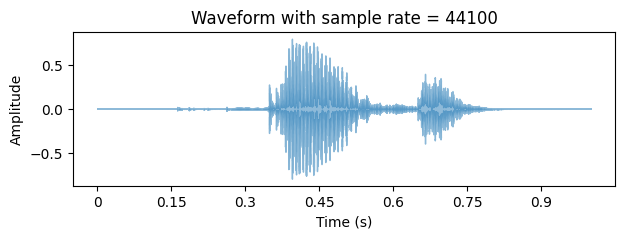

In [3]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

file = r"C:\Users\lenovo\Desktop\digits_sound\eight\4a1e736b_nohash_2.wav"

sr = 44100  # 
signal, sample_rate = librosa.load(file, sr = sr)

FIG_SIZE = (7,2)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Waveform with sample rate = {sample_rate}")

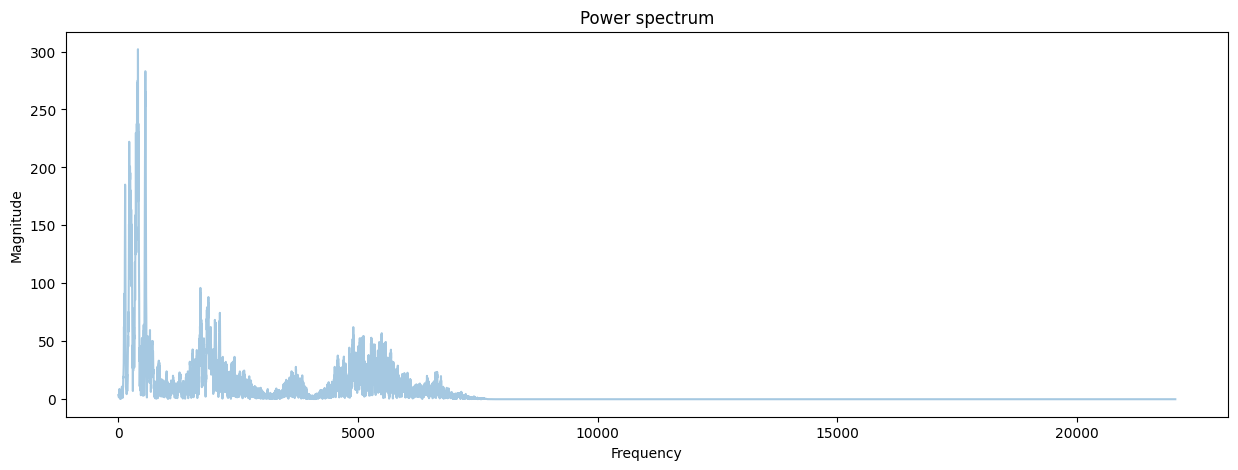

In [4]:
fft = np.fft.fft(signal) 
spectrum = np.abs(fft)
f = np.linspace(0, sample_rate, len(spectrum))
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
FIG_SIZE = ( 15 , 5 ) 
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
#plt.xticks(np.arange(0 , 10 , 1) )
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()

In [5]:
np.round(spectrum * 10000 , 2) 

array([38102.45, 37513.68, 37881.71, ..., 33814.85, 37881.71, 37513.68],
      dtype=float32)

Text(0.5, 1.0, 'Spectrogram')

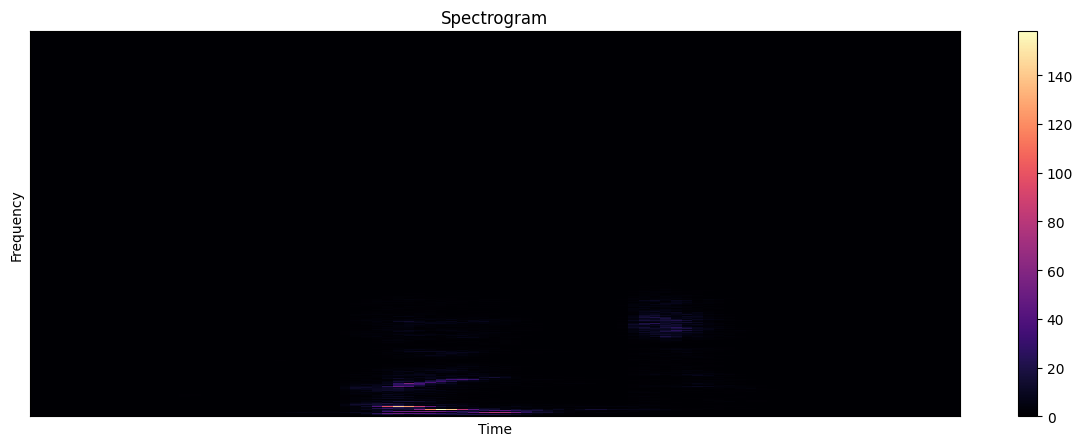

In [6]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
stft = librosa.stft(signal, 
                    n_fft=n_fft,
                    hop_length=hop_length)
spectrogram = np.abs(stft)


# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Human hearing is logarithmic - we perceive differences in sound intensity on a logarithmic rather than linear scale. A sound that's 10 times more powerful doesn't sound 10 times louder to us.


Text(0.5, 1.0, 'Spectrogram (dB)')

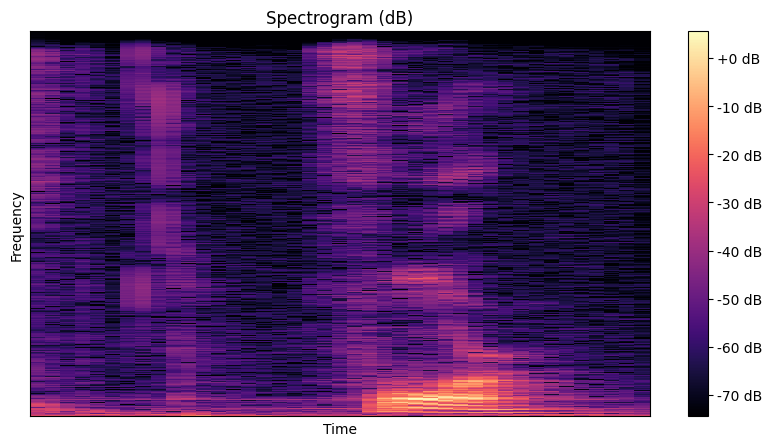

In [72]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")


# MFCCs


In [68]:
log_spectrogram.shape

(1025, 41)